### Notebook that reads the output of FMDeg from TCGA dataset and visualize the scatter plot of the output

### Read data 

In [1]:
import pandas as pd
import numpy as np
import os
import re
import glob
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

### paths

In [2]:
base="../../" 

# TCGA
path_output_tcga= os.path.join(base,"data","signals_E3_ligases_tcga.tsv")
path_colors = os.path.join(base,"degrons",'positive_selection','analysis',"dict_colors.json")
# Plots 
path_output_plots = os.path.join(base,"plots","Figure6")


In [3]:
def set_color(row,colors):
    if row["Cancer_Type"] in colors:
        return colors[row["Cancer_Type"]]
    else:
        return "black"

### Read DataFrame

### Type

In [4]:
df_e3_ligases = pd.read_csv(path_output_tcga,sep="\t")

### define colors

In [5]:
dict_colors = json.load(open(path_colors,'r'))


# Plot FM

### Prepare plots

In [6]:
df_e3_ligases["color"] = df_e3_ligases.apply(lambda row:set_color(row,dict_colors),axis=1)
df_e3_ligases["significant_FM"] = df_e3_ligases.apply(lambda row: row["oncodrivefml_qvalue"]<0.1,axis=1)
df_e3_ligases["significant_SM"] = df_e3_ligases.apply(lambda row: row["dndscv_qvalue"]<0.1,axis=1)

In [7]:
df_e3_ligases.head()

Hugo_Symbol Cancer_Type  oncodrivefml_qvalue  log_qvalue_fml  dndscv_qvalue  \
0         DTL         ACC                  1.0             1.0            1.0   
1       UBOX5         ACC                  1.0             1.0            1.0   
2      RNF169         ACC                  1.0             1.0            1.0   
3       RNF44         ACC                  1.0             1.0            1.0   
4      TRIM33         ACC                  1.0             1.0            1.0   

   n_mis  n_non  n_spl  log_qvalue_dndscv    color  significant_FM  \
0    0.0    1.0    0.0       4.031016e-10  #3cb44b           False   
1    0.0    1.0    0.0       4.031016e-10  #3cb44b           False   
2    0.0    1.0    0.0       4.031016e-10  #3cb44b           False   
3    0.0    1.0    0.0       4.031016e-10  #3cb44b           False   
4    0.0    1.0    0.0       4.031016e-10  #3cb44b           False   

   significant_SM  
0           False  
1           False  
2           False  
3           False  
4           False

### Matplotlib

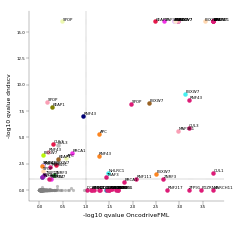

In [8]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
df_sigs = df_e3_ligases[(df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"])]
df_not_sigs = df_e3_ligases[~((df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"]))
                            &(df_e3_ligases["oncodrivefml_qvalue"]<1.0)&(df_e3_ligases["dndscv_qvalue"]<1.0)].sample(frac=0.1)
for cancer_type in df_sigs["Cancer_Type"].unique():
    ys = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_dndscv"].values
    xs = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_fml"].values
    sc=ax.scatter(x=xs,y=ys,color=dict_colors[cancer_type],s=20,linewidths=0.0,label=cancer_type,marker="o")
    for i in range(len(xs)):
        ax.annotate(xy=(xs[i]+0.01,ys[i]+0.1),s=df_sigs[(df_sigs["Cancer_Type"]==cancer_type)]["Hugo_Symbol"].values[i],fontsize=4,fontweight="normal")
        pass
# create the coordinates for the errorbars

ax.set_ylabel("-log10 qvalue dndscv",fontsize=6)
ax.set_xlabel("-log10 qvalue OncodriveFML",fontsize=6)
marker_size = 20
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handler_map={type(sc): HandlerPathCollection(update_func=update_prop)},scatterpoints=1, frameon=False, labelspacing=0.5, markerscale=1,loc="upper left",fontsize=6,labels=labels,handles=handles)
ax.scatter(x=df_not_sigs["log_qvalue_fml"].values,y=df_not_sigs["log_qvalue_dndscv"].values,color="grey",s=10,alpha=0.5,linewidths=0)

#x=ax.legend()
# Adjust axis
#ylim = (0,5)
#ax.set_ylim(ylim)
#ax.set_yticks([x for x in range(ylim[0],ylim[1]+1,1)])
ax.axvline(x=-np.log10(0.1),ymin=0,ymax=np.nanmax(df_sigs["log_qvalue_dndscv"].values),color="black",ls="--",lw=0.2)
ax.axhline(y=-np.log10(0.1),xmin=0,xmax=np.nanmax(df_sigs["log_qvalue_fml"].values),color="black",ls="--",lw=0.2)
ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
plt.savefig(path_output_plots+'/E3_ligases_TCGA.pdf', dpi=100,bbox_inches="tight")
plt.show()
None


### PNG

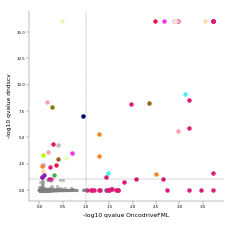

In [9]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
df_sigs = df_e3_ligases[(df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"])]
df_not_sigs = df_e3_ligases[~((df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"]))
                            &(df_e3_ligases["oncodrivefml_qvalue"]<1.0)&(df_e3_ligases["dndscv_qvalue"]<1.0)]
for cancer_type in df_sigs["Cancer_Type"].unique():
    ys = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_dndscv"].values
    xs = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_fml"].values
    sc=ax.scatter(x=xs,y=ys,color=dict_colors[cancer_type],s=20,linewidths=0.0,label=cancer_type,marker="o")
    for i in range(len(xs)):
        #ax.annotate(xy=(xs[i]+0.01,ys[i]+0.1),s=df_sigs[(df_sigs["Cancer_Type"]==cancer_type)]["Hugo_Symbol"].values[i],fontsize=4,fontweight="normal")
        pass
# create the coordinates for the errorbars

ax.set_ylabel("-log10 qvalue dndscv",fontsize=6)
ax.set_xlabel("-log10 qvalue OncodriveFML",fontsize=6)
marker_size = 20
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
#ax.legend(handler_map={type(sc): HandlerPathCollection(update_func=update_prop)},scatterpoints=1, frameon=False, labelspacing=0.5, markerscale=1,loc="upper left",fontsize=6,labels=labels,handles=handles)
ax.scatter(x=df_not_sigs["log_qvalue_fml"].values,y=df_not_sigs["log_qvalue_dndscv"].values,color="grey",s=10,alpha=0.5,linewidths=0)

#x=ax.legend()
# Adjust axis
#ylim = (0,5)
#ax.set_ylim(ylim)
#ax.set_yticks([x for x in range(ylim[0],ylim[1]+1,1)])
ax.axvline(x=-np.log10(0.1),ymin=0,ymax=np.nanmax(df_sigs["log_qvalue_dndscv"].values),color="black",ls="--",lw=0.2)
ax.axhline(y=-np.log10(0.1),xmin=0,xmax=np.nanmax(df_sigs["log_qvalue_fml"].values),color="black",ls="--",lw=0.2)
ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
plt.savefig(path_output_plots+'/E3_ligases_TCGA.png', dpi=800,bbox_inches="tight")
plt.show()
None


In [10]:
df_sigs["Cancer_Type"].unique()

array(['ACC', 'UCS', 'DLBC', 'PAAD', 'PRAD', 'KIRP', 'KIRC', 'ESCA',
       'CESC', 'LIHC', 'COADREAD', 'BRCA', 'HNSC', 'STAD', 'BLCA', 'LUSC',
       'UCEC', 'LUAD', 'SKCM', 'PAN'], dtype=object)